In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/BATS_zooplankton.csv')
df.columns = df.iloc[34]
df = df[35:].reset_index(drop=True)
df.head(5)

34,Cruise,Date,Tow,Latitiude_Deg,Latitude_Min,Longitude_Deg,Longitude_Min,Time_in,Time_out,Duration_min,...,Wet_weight,Dry_weight,Wet_weight/vol,Dry_weight/vol,Total_wet/vol,Total_dry/vol,Wet/vol_norm,Dry/vol_norm,Total_wet/vol_norm,Total_dry/vol_norm
0,20066,19940406,1,31,33.89,63,52.45,1558,1626,28,...,2460,210.4,18.15,1.55,53.73,4.22,3630.98,310.55,10745.33,843.69
1,20066,19940406,1,31,33.89,63,52.45,1558,1626,28,...,1220,120.2,9,0.89,53.73,4.22,1800.73,177.42,10745.33,843.69
2,20066,19940406,1,31,33.89,63,52.45,1558,1626,28,...,2200,110.4,16.24,0.81,53.73,4.22,3247.22,162.95,10745.33,843.69
3,20066,19940406,1,31,33.89,63,52.45,1558,1626,28,...,940,94.4,6.94,0.7,53.73,4.22,1387.45,139.34,10745.33,843.69
4,20066,19940406,1,31,33.89,63,52.45,1558,1626,28,...,460,36.2,3.39,0.27,53.73,4.22,678.96,53.43,10745.33,843.69


In [3]:
df.isna().sum() #NO NAN Values

34
Cruise                0
Date                  0
Tow                   0
Latitiude_Deg         0
Latitude_Min          0
Longitude_Deg         0
Longitude_Min         0
Time_in               0
Time_out              0
Duration_min          0
Max_depth             0
Water_Vol             0
Sieve_Size            0
Wet_weight            0
Dry_weight            0
Wet_weight/vol        0
Dry_weight/vol        0
Total_wet/vol         0
Total_dry/vol         0
Wet/vol_norm          0
Dry/vol_norm          0
Total_wet/vol_norm    0
Total_dry/vol_norm    0
dtype: int64

In [4]:
#Convert to date time 
df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')
df

34,Cruise,Date,Tow,Latitiude_Deg,Latitude_Min,Longitude_Deg,Longitude_Min,Time_in,Time_out,Duration_min,...,Wet_weight,Dry_weight,Wet_weight/vol,Dry_weight/vol,Total_wet/vol,Total_dry/vol,Wet/vol_norm,Dry/vol_norm,Total_wet/vol_norm,Total_dry/vol_norm
0,20066,1994-04-06,1,31,33.89,63,52.45,1558,1626,28,...,2460,210.4,18.15,1.55,53.73,4.22,3630.98,310.55,10745.33,843.69
1,20066,1994-04-06,1,31,33.89,63,52.45,1558,1626,28,...,1220,120.2,9,0.89,53.73,4.22,1800.73,177.42,10745.33,843.69
2,20066,1994-04-06,1,31,33.89,63,52.45,1558,1626,28,...,2200,110.4,16.24,0.81,53.73,4.22,3247.22,162.95,10745.33,843.69
3,20066,1994-04-06,1,31,33.89,63,52.45,1558,1626,28,...,940,94.4,6.94,0.7,53.73,4.22,1387.45,139.34,10745.33,843.69
4,20066,1994-04-06,1,31,33.89,63,52.45,1558,1626,28,...,460,36.2,3.39,0.27,53.73,4.22,678.96,53.43,10745.33,843.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294,10399,2022-12-13,4,31,38.242,64,12.072,2243,2319,36,...,2599.6,385.2,1.73,0.26,23.04,3.28,346.91,51.4,4607.28,656.94
7295,10399,2022-12-13,4,31,38.242,64,12.072,2243,2319,36,...,4246.8,669.6,2.83,0.45,23.04,3.28,566.73,89.36,4607.28,656.94
7296,10399,2022-12-13,4,31,38.242,64,12.072,2243,2319,36,...,2469.6,446.8,1.65,0.3,23.04,3.28,329.56,59.62,4607.28,656.94
7297,10399,2022-12-13,4,31,38.242,64,12.072,2243,2319,36,...,1153,251.4,0.77,0.17,23.04,3.28,153.87,33.55,4607.28,656.94


<Axes: >

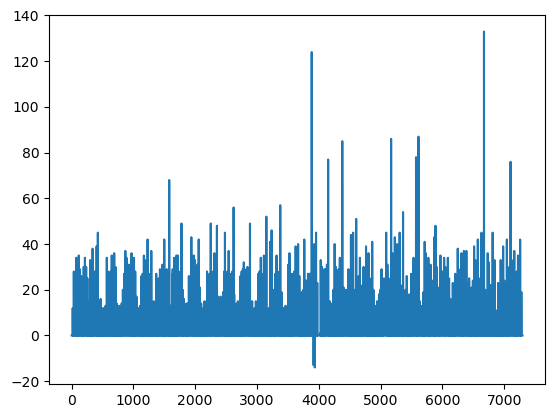

In [13]:
diffs = df['Date'].diff().reset_index().drop(columns = ['index']).apply(lambda val: val.Date.days, axis = 1)
diffs.plot()
#diffs

In [ ]:
dt_gb = df.groupby('Date').count().reset_index()
dt_gb

In [ ]:
dt_gb['YearMonth'] = dt_gb['Date'].dt.to_period('M')
ym_gb = dt_gb.groupby('YearMonth').count()
ym_gb

In [ ]:
full_range = pd.period_range(start="1994-04", end="2022-12", freq="M")
missing_months = full_range.difference(ym_gb.index)
print(missing_months)

In [ ]:
ym_gb.loc['2000-02']

In [ ]:
df['YearMonth'] = df['Date'].dt.to_period('M')
df[df['YearMonth'] == '2000-02']
df['Total_dry/vol_norm'] = df['Total_dry/vol_norm'].astype(float)
df = df[['YearMonth','Total_dry/vol_norm']].groupby('YearMonth').mean()
df = df[df['Total_dry/vol_norm'] > 0 ]
df

In [ ]:
df.plot()

In [ ]:
full_range = pd.period_range(start="1994-04", end="2022-12", freq="M")
missing_months = full_range.difference(df.index)
print(missing_months)

In [ ]:
#Fill in missing months
full_range = pd.period_range(start="1994-04", end="2022-12", freq="M")
df = df.reindex(full_range)
df.reset_index(inplace=True)
df.rename(columns={'index': 'YearMonth'}, inplace=True)
df

In [ ]:
#should have no missing months 
full_range = pd.period_range(start="1994-04", end="2022-12", freq="M")
missing_months = full_range.difference(df['YearMonth'])
print(missing_months)

In [ ]:
df.plot()

In [ ]:
df.to_csv('../Data/BATS_cleaned.csv')